<a href="https://colab.research.google.com/github/sczopek/spaceInvadersAtariRl/blob/main/evaluateModelPerf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# stable-baselines3 == 'https://stable-baselines3.readthedocs.io/en/master/index.html'
!pip install "stable-baselines3[extra]<=2.3.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.2 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446667 sha256=6dc18818c1c16c4c2423103d87bc45616b835906382e7bcc24841497986966af
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import matplotlib.pyplot as plt

import gymnasium

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/gdrive


In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("SpaceInvaders-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)

In [ ]:
model = PPO.load("/content/gdrive/MyDrive/models/PPO_try2/ppo_spaceInvadersFrameSkipWinningParams_178798848_steps", verbose=1, force_reset=False)
model.set_env(vec_env)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:449: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file_content, map_locati

Wrapping the env in a VecTransposeImage.


In [ ]:
from google.colab import drive
import pickle

# Default PPO Agent, after 30M steps of training
ep_reward, ep_len = evaluate_policy(model, vec_env, n_eval_episodes=500, return_episode_rewards=True)

# print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

print(ep_reward)
print(ep_len)
print(len(ep_len))


f_out = open('ep_reward.pkl', 'wb')
pickle.dump(ep_reward, f_out)
f_out.close()

f_out = open('ep_len.pkl', 'wb')
pickle.dump(ep_len, f_out)
f_out.close()


# copy it evak results to google drive
!cp ep_reward.pkl ./gdrive/MyDrive/models/evalPPO/ep_reward_500_178mTraining.pkl
!cp ep_len.pkl ./gdrive/MyDrive/models/evalPPO/ep_len_500_178mTraining.pkl

[3035.0, 2815.0, 3540.0, 4630.0, 1075.0, 4620.0, 580.0, 5720.0, 5295.0, 845.0, 2580.0, 7505.0, 3960.0, 1610.0, 3065.0, 5045.0, 4485.0, 1235.0, 9710.0, 2690.0, 8705.0, 10210.0, 7480.0, 790.0, 3600.0, 7990.0, 9405.0, 3570.0, 1515.0, 2895.0, 6595.0, 2720.0, 3020.0, 2490.0, 8825.0, 2125.0, 2560.0, 3315.0, 10245.0, 2085.0, 5645.0, 5015.0, 5190.0, 6650.0, 1425.0, 3535.0, 3305.0, 1175.0, 9430.0, 1145.0, 6255.0, 5955.0, 16995.0, 7015.0, 2610.0, 3955.0, 2320.0, 7620.0, 3125.0, 4215.0, 4165.0, 3070.0, 585.0, 2100.0, 4170.0, 5135.0, 4970.0, 605.0, 2310.0, 11040.0, 12800.0, 3070.0, 9745.0, 1905.0, 3430.0, 4410.0, 3725.0, 2170.0, 1785.0, 5720.0, 4985.0, 7285.0, 2550.0, 7765.0, 2155.0, 2265.0, 2715.0, 9050.0, 2150.0, 1290.0, 4515.0, 12720.0, 2125.0, 4830.0, 5090.0, 3510.0, 4650.0, 4240.0, 5415.0, 2520.0, 1175.0, 6625.0, 6670.0, 18700.0, 7340.0, 6360.0, 4610.0, 4780.0, 10680.0, 1230.0, 970.0, 6810.0, 3975.0, 24935.0, 1905.0, 4090.0, 5605.0, 9220.0, 9375.0, 3095.0, 12460.0, 6085.0, 10225.0, 2135.0, 19

In [ ]:
print("Mean Ep Reqward: ", np.mean(ep_reward))
print("Mean Ep Length: ", np.mean(ep_len))
print()
print("Max Ep Reward (High Score): ", max(ep_reward))
print("Max Ep Length: ", max(ep_len))
# is max ep reward the same episode as max ep length?

5024.11
5971.586
500

24935.0
25393


In [ ]:
# load eval results from disk (google drive)

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_reward_500_178mTraining.pkl', 'rb')
# pkl_file = open('ep_reward.pkl', 'rb')
ep_reward_disk = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_len_500_178mTraining.pkl', 'rb')
# pkl_file = open('ep_len.pkl', 'rb')
ep_len_disk = pickle.load(pkl_file)
pkl_file.close()

n_eval_episodes = len(ep_reward_disk)
print('num episodes: ', n_eval_episodes)

num episodes:  500


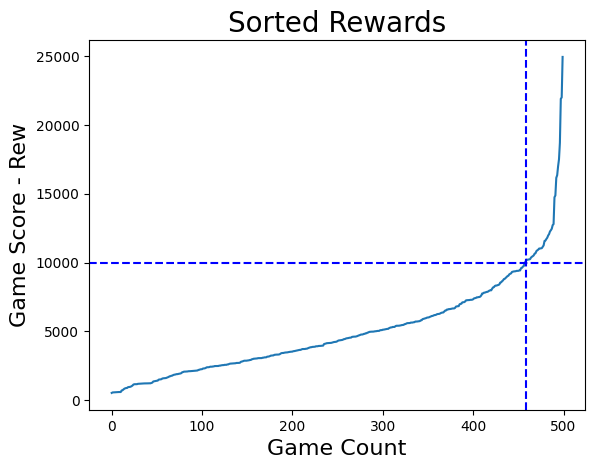

In [ ]:
# Plot Sorted Ep Rewards vs Game Number
# Show index where game score rolls over (goes above 9999)

import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = n_eval_episodes
X = np.sort(ep_reward_disk)
F = np.array(range(N))

totalScorePerWave = 630 # = 6 cols * 105 points per col
# points per col = 5 + 10 + 15 + 20 + 25 + 30
numWavesForScoreRollover = 16

scoreRollOver = 9999
idxScoreReset = np.argmax(X>scoreRollOver)

plt.plot(F, X)
plt.title('Sorted Rewards', fontsize = 20)
plt.axvline(x=F[idxScoreReset], ymin=0, ymax=X[-1], color='b',  ls='--')
plt.axhline(y=scoreRollOver, linestyle='--', color='b', xmin=0, xmax=idxScoreReset)
plt.ylabel('Game Score - Rew', fontsize = 16)
plt.xlabel('Game Count', fontsize = 16)
plt.show()

In [ ]:
# calculate what fraction of the games where the score rolls over

print('idxScoreReset: ', idxScoreReset)
print('exceptional frac: ', 1 - idxScoreReset/n_eval_episodes)
print('max score: ', X[-1])

idxScoreReset:  458
exceptional frac:  0.08399999999999996
max score:  24935.0


2235735.0
0.08578304188359513
0.9980000000000002
2.051224755446759


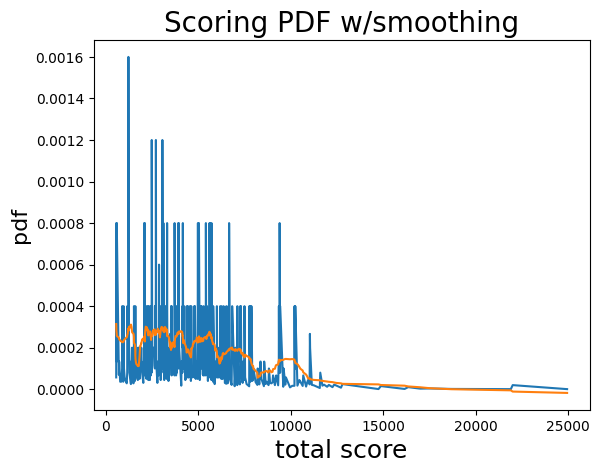

In [ ]:
# plot pdf distribution of ep scores, use smoothing

from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

# PDF Plot of Scores
N = n_eval_episodes
X_0 = np.sort(ep_reward)
F_0 = np.array(range(N))/float(N)

prev_x = X_0[0]
sum = 1/N
X = np.array([],dtype=int)
diffX = X = np.array([],dtype=int)
F = np.array([])
for x in X_0[1:]:
  if x != prev_x:
    X = np.append(X, x)
    diffX = np.append(diffX, x-prev_x)
    F = np.append(F, sum/(x-prev_x))
    sum = 1/N
  else:
    sum += 1/N
  prev_x = x

yhat = savgol_filter(F, 51, 3) # window size 51, polynomial order 3
# yhat = yhat/np.sum(yhat*diffX)

print(np.sum(X))
print(np.sum(F))
print(np.sum(F*diffX))
print(np.sum(yhat*diffX))


plt.plot(X, F)
plt.plot(X, yhat)
plt.title('Scoring PDF w/smoothing', fontsize = 20)
plt.xlabel('total score', fontsize = 18)
plt.ylabel('pdf', fontsize = 16)
plt.show()

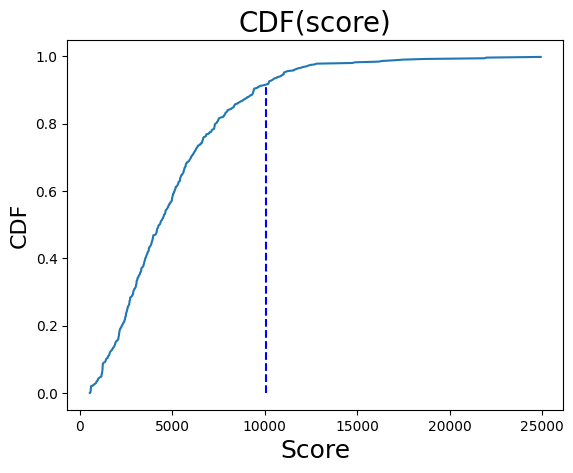

In [ ]:
# CDF Plot of Scores
# show score roll over line

N = n_eval_episodes
X = np.sort(ep_reward)
F = np.array(range(N))/float(N)

# totalScorePerWave = 630 # = 6 cols * 105 points per col
# # points per col = 5 + 10 + 15 + 20 + 25 + 30
# numWavesForScoreRollover = 16

scoreRollOver = 9999
idxScoreReset = np.argmax(X>scoreRollOver)

plt.plot(X, F)
plt.title('CDF(score)', fontsize = 20)
plt.vlines(x=X[idxScoreReset], ymin=0, ymax=F[idxScoreReset], color='b',  ls='--')

plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

In [ ]:
# Is Mean Ep Rew different from Median Ep Rew?
# By how many std devs?

mean_rew = np.mean(ep_reward)
median_rew = np.median(ep_reward)
std_rew = np.std(ep_reward)
print("Mean Rew: ", mean_rew)
print("Median Rew: ", median_rew)
print("(mean-median)/std: ", np.abs(mean_rew-median_rew)/std_rew)

Mean Rew:  5024.11
Median Rew:  4287.5
(mean-median)/std:  0.21523036920538377
